✅ This dataset was taken from Kaggle website, https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market. The goal of the analysis is to build a model that will predict the future price of property.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
import plotly.express as px  
import plotly.graph_objects as go
from lightgbm import LGBMRegressor 
from scipy import stats
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap

In [ ]:
df = pd.read_csv('Downloads/NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [3]:
df.shape

(4801, 17)

In [4]:
df.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(214)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4587 non-null   object 
 1   TYPE                         4587 non-null   object 
 2   PRICE                        4587 non-null   int64  
 3   BEDS                         4587 non-null   int64  
 4   BATH                         4587 non-null   float64
 5   PROPERTYSQFT                 4587 non-null   float64
 6   ADDRESS                      4587 non-null   object 
 7   STATE                        4587 non-null   object 
 8   MAIN_ADDRESS                 4587 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4587 non-null   object 
 10  LOCALITY                     4587 non-null   object 
 11  SUBLOCALITY                  4587 non-null   object 
 12  STREET_NAME                  4587 non-null   object 
 13  LONG_NAME              

# For the ease of use I'll turn all column names into lowercase

In [ ]:
df.columns = df.columns.str.lower()
df.head()

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brokertitle                  4587 non-null   object 
 1   type                         4587 non-null   object 
 2   price                        4587 non-null   int64  
 3   beds                         4587 non-null   int64  
 4   bath                         4587 non-null   float64
 5   propertysqft                 4587 non-null   float64
 6   address                      4587 non-null   object 
 7   state                        4587 non-null   object 
 8   main_address                 4587 non-null   object 
 9   administrative_area_level_2  4587 non-null   object 
 10  locality                     4587 non-null   object 
 11  sublocality                  4587 non-null   object 
 12  street_name                  4587 non-null   object 
 13  long_name              

In [11]:
df['price'].sort_values()

317           2494
310           3225
360           5800
463          49500
979          60000
           ...    
141       56000000
1075      60000000
69        65000000
1        195000000
304     2147483647
Name: price, Length: 4587, dtype: int64

In [12]:
df.describe()

,price,beds,bath,propertysqft,latitude,longitude
count,4.587000e+03,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000
mean,2.381172e+06,3.365816,2.377735,2177.712426,40.713932,-73.941584
std,3.206831e+07,2.628808,1.968503,2283.095559,0.087738,0.101276
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.638588,-73.987420
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726667,-73.949116
75%,1.498500e+06,4.000000,3.000000,2184.207862,40.771913,-73.869455
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


# Number of bathrooms in some rows is an unusual decimal and it needs to be checked

In [ ]:
bath_decimals = df[df['bath'] % 1 != 0]
bath_decimals

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
11,Brokered by Re/Max Edge,Townhouse for sale,689000,3,2.373861,1162.000000,456 Van Name Ave,"Staten Island, NY 10303","456 Van Name AveStaten Island, NY 10303",United States,New York,Richmond County,Staten Island,Van Name Avenue,"456 Van Name Ave, Staten Island, NY 10303, USA",40.624996,-74.155306
27,Brokered by Century 21 Realty First,Multi-family home for sale,2250000,12,2.373861,5670.000000,2361 81st St,"Brooklyn, NY 11214","2361 81st StBrooklyn, NY 11214",11214,United States,New York,Kings County,81st Street,"2361 81st St, Brooklyn, NY 11214, USA",40.602654,-73.986940
68,Brokered by Ashford Homes,Multi-family home for sale,1489000,6,2.373861,3780.000000,205 Wiman Ave,"Staten Island, NY 10308","205 Wiman AveStaten Island, NY 10308",United States,New York,Richmond County,Staten Island,Wiman Avenue,"205 Wiman Ave, Staten Island, NY 10308, USA",40.539532,-74.145088
69,Brokered by Sotheby's International Realty - E...,Townhouse for sale,65000000,3,2.373861,15200.000000,4 E 79th St,"New York, NY 10075","4 E 79th StNew York, NY 10075",United States,New York,New York County,New York,East 79th Street,"4 E 79th St, New York, NY 10075, USA",40.776561,-73.963317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,NoBroker,Multi-family home for sale,2000000,8,2.373861,2184.207862,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.614758,-73.975714
4776,Brokered by CENTURY 21 KR REALTY,Pending,555000,3,2.373861,2184.207862,780 Stafford Ave,"Staten Island, NY 10309","780 Stafford AveStaten Island, NY 10309",United States,New York,Richmond County,Staten Island,Stafford Avenue,"780 Stafford Ave, Staten Island, NY 10309, USA",40.540344,-74.204106
4783,Brokered by Silverside Realty LLC,Multi-family home for sale,799000,6,2.373861,2000.000000,4568 Carpenter Ave,"Bronx, NY 10470","4568 Carpenter AveBronx, NY 10470",United States,New York,Bronx County,The Bronx,Carpenter Avenue,"4568 Carpenter Ave, Bronx, NY 10470, USA",40.902780,-73.854059
4788,Brokered by J Shayovitz Real Estate Corp,Co-op for sale,4750000,3,2.373861,2969.000000,1175 Park Ave Unit 1C,"New York, NY 10128","1175 Park Ave Unit 1CNew York, NY 10128",New York,New York County,New York,Manhattan,1175,"1175 Park Ave #1c, New York, NY 10128, USA",40.784392,-73.953840


# After checking the addresses with unusual bath decimals on the internet (Zillow.com), I've found out that the properties have a regular amount of baths. I assume the decimals is a result of filling in the missing values of the dataset with the mean or median values, so I'll keep it as it is

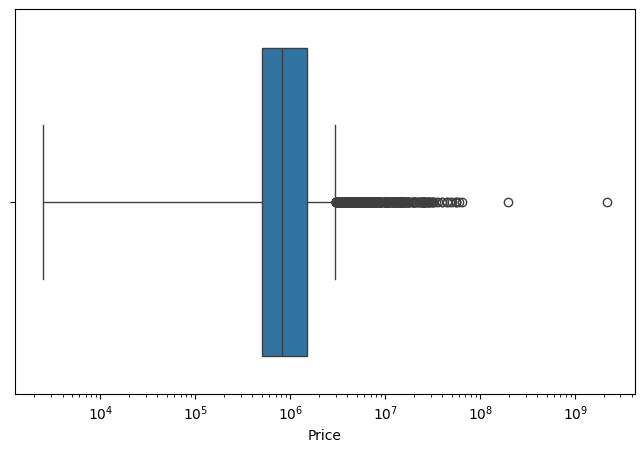

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["price"])
plt.xlabel("Price")
plt.xscale("log")
plt.show()

In [16]:
top10 = df.sort_values(by='price', ascending=False).head(10)
top10

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
304,Brokered by ANNE LOPA REAL ESTATE,House for sale,2147483647,7,6.000000,10000.000000,6659-6675 Amboy Rd,"New York, NY 10309","6659-6675 Amboy RdNew York, NY 10309",United States,New York,Richmond County,Staten Island,Amboy Road,"6659 Amboy Rd, Staten Island, NY 10309, USA",40.518484,-74.224418
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
69,Brokered by Sotheby's International Realty - E...,Townhouse for sale,65000000,3,2.373861,15200.000000,4 E 79th St,"New York, NY 10075","4 E 79th StNew York, NY 10075",United States,New York,New York County,New York,East 79th Street,"4 E 79th St, New York, NY 10075, USA",40.776561,-73.963317
1075,Brokered by COMPASS,Co-op for sale,60000000,8,8.000000,2184.207862,960 5th Ave Unit 12,"Manhattan, NY 10075","960 5th Ave Unit 12Manhattan, NY 10075",New York,New York County,New York,Manhattan,960,"960 5th Ave #12, New York, NY 10075, USA",40.775642,-73.964247
141,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,56000000,11,10.000000,24000.000000,9 W 54th St,"New York, NY 10019","9 W 54th StNew York, NY 10019",United States,New York,New York County,New York,West 54th Street,"9 W 54th St, New York, NY 10019, USA",40.761600,-73.976191
99,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,55000000,8,8.000000,12000.000000,25 Riverside Dr,"New York, NY 10023","25 Riverside DrNew York, NY 10023",United States,New York,New York County,New York,Riverside Drive,"25 Riverside Dr, New York, NY 10023, USA",40.782238,-73.984632
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
626,"Brokered by Nest Seekers International, Midtown",Condo for sale,50000000,6,6.000000,6569.000000,100 Vandam St Apt 20A,"New York, NY 10013","100 Vandam St Apt 20ANew York, NY 10013",New York,New York County,New York,Manhattan,100,"100 Vandam St #20a, New York, NY 10013, USA",40.726633,-74.008832
1453,Brokered by Corcoran East Side,Co-op for sale,48000000,5,2.373861,2184.207862,740 Park Ave # 4 & 5B,"New York, NY 10021","740 Park Ave # 4 & 5BNew York, NY 10021",New York,New York County,New York,Manhattan,740,"740 Park Ave #5, New York, NY 10021, USA",40.770752,-73.964528
3388,Brokered by Sotheby's International Realty - E...,Co-op for sale,45000000,5,2.373861,2184.207862,4 E 66th St Fl 7,"New York, NY 10065","4 E 66th St Fl 7New York, NY 10065",New York,New York County,New York,Manhattan,4,"4 E 66th St Fl 7, New York, NY 10065, USA",40.768301,-73.969734


# The first 2 addresses of the properties with the highest prices look unusual so i've checked them and found out, that the first entry is an error, and the second one is real. Next step is to check if there are other outliers. 

In [18]:
df['zscore'] = stats.zscore(df['price'])  
outliers = df[np.abs(df['zscore']) > 3]
outliers

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude,zscore
1,Brokered by Serhant,Condo for sale,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,6.007172
304,Brokered by ANNE LOPA REAL ESTATE,House for sale,2147483647,7,6.0,10000.0,6659-6675 Amboy Rd,"New York, NY 10309","6659-6675 Amboy RdNew York, NY 10309",United States,New York,Richmond County,Staten Island,Amboy Road,"6659 Amboy Rd, Staten Island, NY 10309, USA",40.518484,-74.224418,66.898957


In [19]:
df = df[np.abs(df['zscore']) <= 3] 
df.reset_index(drop=True, inplace=True)  
df.head()

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude,zscore
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,-0.064437
1,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,-0.066153
2,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,-0.072109
3,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,1.641015
4,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.0,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725,-0.052742


# Outlers are identified and removed.

In [ ]:
top_10 = df.sort_values(by='price', ascending=False).head(10)
top_10

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude,zscore
68,Brokered by Sotheby's International Realty - E...,Townhouse for sale,65000000,3,2.373861,15200.000000,4 E 79th St,"New York, NY 10075","4 E 79th StNew York, NY 10075",United States,New York,New York County,New York,East 79th Street,"4 E 79th St, New York, NY 10075, USA",40.776561,-73.963317,1.952883
1042,Brokered by COMPASS,Co-op for sale,60000000,8,8.000000,2184.207862,960 5th Ave Unit 12,"Manhattan, NY 10075","960 5th Ave Unit 12Manhattan, NY 10075",New York,New York County,New York,Manhattan,960,"960 5th Ave #12, New York, NY 10075, USA",40.775642,-73.964247,1.796949
137,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,56000000,11,10.000000,24000.000000,9 W 54th St,"New York, NY 10019","9 W 54th StNew York, NY 10019",United States,New York,New York County,New York,West 54th Street,"9 W 54th St, New York, NY 10019, USA",40.761600,-73.976191,1.672202
3,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,1.641015
97,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,55000000,8,8.000000,12000.000000,25 Riverside Dr,"New York, NY 10023","25 Riverside DrNew York, NY 10023",United States,New York,New York County,New York,Riverside Drive,"25 Riverside Dr, New York, NY 10023, USA",40.782238,-73.984632,1.641015
605,"Brokered by Nest Seekers International, Midtown",Condo for sale,50000000,6,6.000000,6569.000000,100 Vandam St Apt 20A,"New York, NY 10013","100 Vandam St Apt 20ANew York, NY 10013",New York,New York County,New York,Manhattan,100,"100 Vandam St #20a, New York, NY 10013, USA",40.726633,-74.008832,1.485081
1404,Brokered by Corcoran East Side,Co-op for sale,48000000,5,2.373861,2184.207862,740 Park Ave # 4 & 5B,"New York, NY 10021","740 Park Ave # 4 & 5BNew York, NY 10021",New York,New York County,New York,Manhattan,740,"740 Park Ave #5, New York, NY 10021, USA",40.770752,-73.964528,1.422707
3258,Brokered by Sotheby's International Realty - E...,Co-op for sale,45000000,5,2.373861,2184.207862,4 E 66th St Fl 7,"New York, NY 10065","4 E 66th St Fl 7New York, NY 10065",New York,New York County,New York,Manhattan,4,"4 E 66th St Fl 7, New York, NY 10065, USA",40.768301,-73.969734,1.329146
3430,Brokered by Sotheby's International Realty - E...,Co-op for sale,44500000,5,6.000000,2184.207862,2 E 67th St Fl 9,"New York, NY 10065","2 E 67th St Fl 9New York, NY 10065",New York,New York County,New York,Manhattan,2,"2 E 67th St Fl 9, New York, NY 10065, USA",40.768973,-73.969136,1.313553
1416,Brokered by Douglas Elliman - New Development,Condo for sale,40000000,5,6.000000,7488.000000,111 Murray St Ph 2,"New York, NY 10007","111 Murray St Ph 2New York, NY 10007",New York,New York County,New York,Manhattan,111,"111 Murray St Ph 2, New York, NY 10007, USA",40.715351,-74.012844,1.173212


In [21]:
df.drop(columns=['zscore'], inplace=True) 
df.head()

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
2,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
3,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
4,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.0,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725


In [22]:
df['type'].value_counts()

type
Co-op for sale                1388
House for sale                 965
Condo for sale                 841
Multi-family home for sale     699
Townhouse for sale             288
Pending                        229
Contingent                      87
Land for sale                   47
For sale                        20
Foreclosure                     14
Condop for sale                  4
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

# For analysis I'll use types of property that can be considered to buy by a family, so it'll be condos, houses, townhouses, coops.

In [24]:
types = ['Co-op for sale', 'House for sale', 'Condo for sale', 'Townhouse for sale']
df_filtered = df[df['type'].isin(types)]
df_filtered.head()

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
2,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
3,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
4,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.0,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725


# Dropping unnecessary columns

In [ ]:
df_filtered = df_filtered.copy()
df_filtered.drop(columns=['brokertitle', 'type', 'address', 'state', 'main_address', 'administrative_area_level_2', 'locality', 'street_name', 'long_name', 'formatted_address'], inplace=True) 
df_filtered.head(10)

,price,beds,bath,propertysqft,sublocality,latitude,longitude
0,315000,2,2.000000,1400.000000,Manhattan,40.761255,-73.974483
1,260000,4,2.000000,2015.000000,Richmond County,40.541805,-74.196109
2,69000,3,1.000000,445.000000,New York County,40.761398,-73.974613
3,55000000,7,2.373861,14175.000000,New York County,40.767224,-73.969856
4,690000,5,2.000000,4004.000000,Kings County,40.674363,-73.958725
5,899500,2,2.000000,2184.207862,New York,40.809448,-73.946777
6,16800000,8,16.000000,33000.000000,Richmond County,40.595002,-74.106424
7,265000,1,1.000000,750.000000,East Bronx,40.821586,-73.874089
8,440000,2,1.000000,978.000000,Brooklyn,40.615738,-73.969694
9,375000,2,1.000000,850.000000,The Bronx,40.824870,-73.922983


In [26]:
df_filtered.describe()

,price,beds,bath,propertysqft,latitude,longitude
count,3.482000e+03,3482.000000,3482.000000,3482.000000,3482.000000,3482.000000
mean,1.983985e+06,2.801264,2.076196,1980.256570,40.720378,-73.940053
std,4.479174e+06,1.700032,1.377029,1604.929572,0.084205,0.095969
min,4.950000e+04,1.000000,0.000000,250.000000,40.499798,-74.247072
25%,4.282500e+05,2.000000,1.000000,1056.000000,40.657701,-73.985077
50%,7.365000e+05,3.000000,2.000000,2043.000000,40.733015,-73.953122
75%,1.478000e+06,3.000000,2.000000,2184.207862,40.773903,-73.874081
max,6.500000e+07,32.000000,16.000000,33000.000000,40.912729,-73.702450


In [27]:
fig = px.scatter_mapbox(
    df_filtered,
    lat="latitude",
    lon="longitude",
    color="price",
    size="price",
    color_continuous_scale=px.colors.sequential.RdBu_r,
    size_max=15,
    zoom=10,
    mapbox_style="carto-positron",
    title="Visualization of house prices"
)
fig.show()

<Axes: xlabel='price', ylabel='Count'>

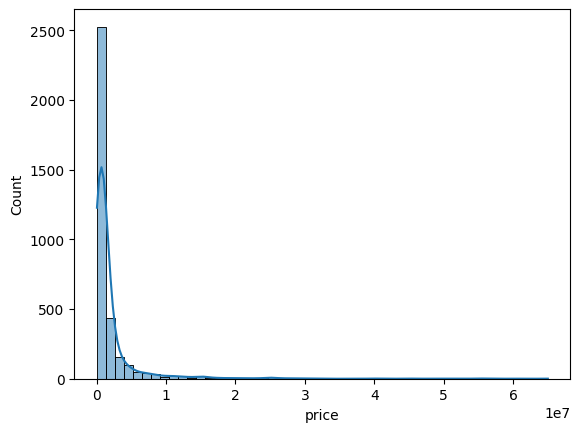

In [28]:
sns.histplot(df_filtered['price'], bins=50, kde=True)

# Price distribution is highely skewed with a large amount of outliers in the high end segment and majority of data points concentrated in a lower range. In this project i'll keep the outliers, but in real case scenario I would treat them separately as a luxury segment with a separate model.

<Axes: xlabel='beds', ylabel='Count'>

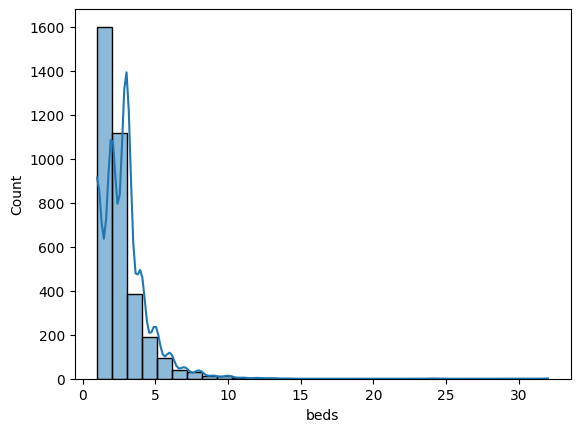

In [27]:
sns.histplot(df_filtered['beds'], bins=30, kde=True)

<Axes: xlabel='bath', ylabel='Count'>

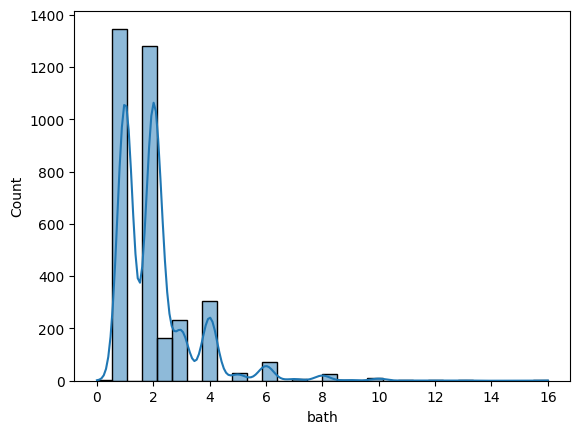

In [29]:
sns.histplot(df_filtered['bath'], bins=30, kde=True)

<Axes: xlabel='propertysqft', ylabel='Count'>

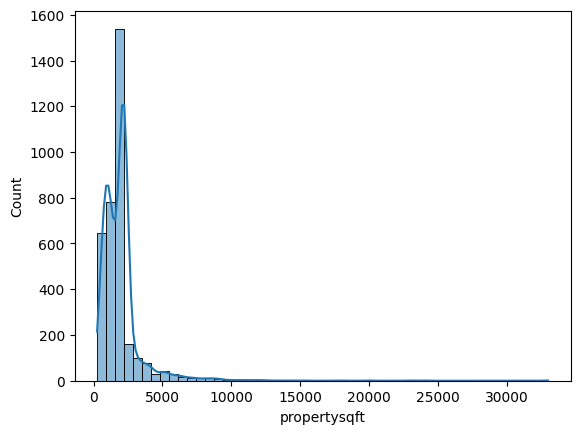

In [30]:
sns.histplot(df_filtered['propertysqft'], bins=50, kde=True)

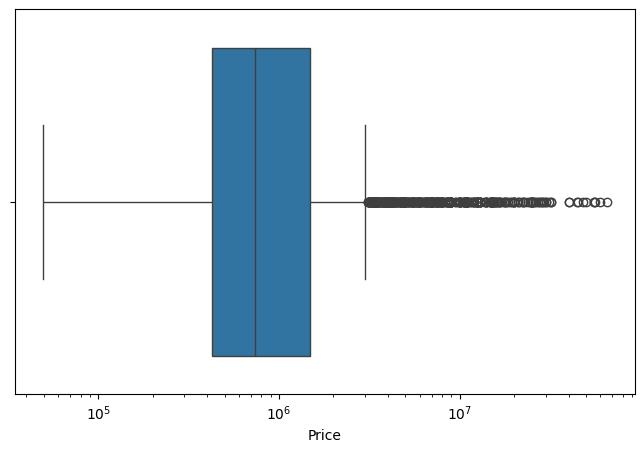

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtered["price"])
plt.xlabel("Price")
plt.xscale("log")
plt.show()

In [32]:
df_filtered.sort_values(by='price', ascending=False)

,price,beds,bath,propertysqft,sublocality,latitude,longitude
68,65000000,3,2.373861,15200.000000,New York County,40.776561,-73.963317
1042,60000000,8,8.000000,2184.207862,New York,40.775642,-73.964247
137,56000000,11,10.000000,24000.000000,New York County,40.761600,-73.976191
97,55000000,8,8.000000,12000.000000,New York County,40.782238,-73.984632
3,55000000,7,2.373861,14175.000000,New York County,40.767224,-73.969856
...,...,...,...,...,...,...,...
128,69900,2,1.000000,700.000000,Bronx County,40.822499,-73.811157
242,69000,1,1.000000,850.000000,The Bronx,40.836662,-73.923959
2,69000,3,1.000000,445.000000,New York County,40.761398,-73.974613
948,60000,3,1.000000,445.000000,New York,40.761398,-73.974613


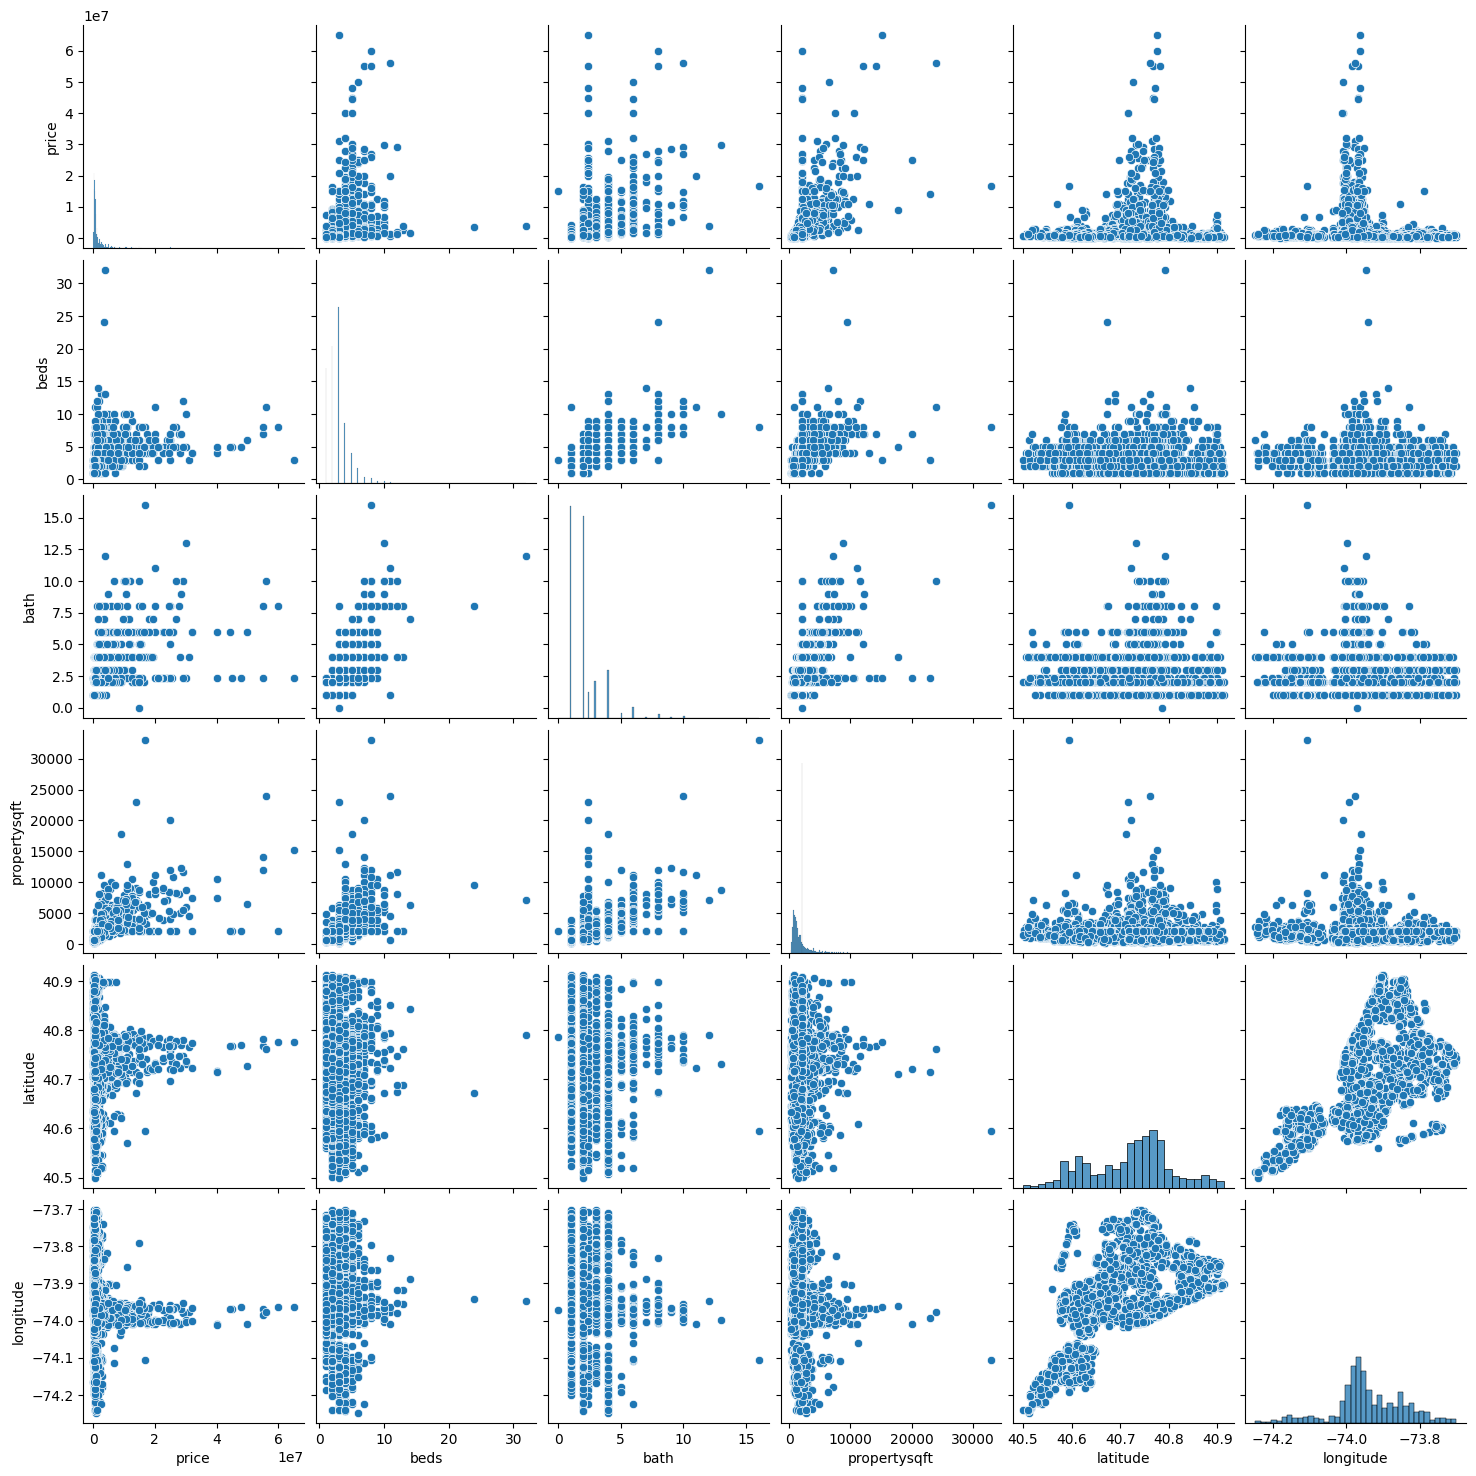

In [33]:
sns.pairplot(df_filtered)

Text(0.5, 1.0, 'Correlation')

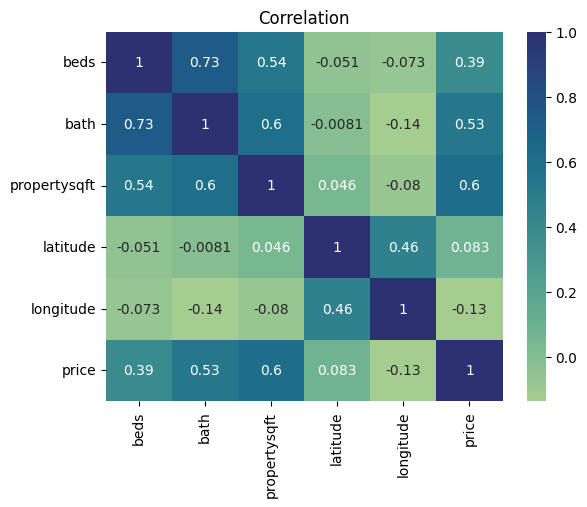

In [34]:
df_corr = df_filtered[['beds', 'bath', 'propertysqft', 'latitude', 'longitude', 'price']].copy()
sns.heatmap(df_corr.corr(), cmap="crest", annot=True)
plt.title('Correlation')

In [35]:
print(df_filtered.columns) 

Index(['price', 'beds', 'bath', 'propertysqft', 'sublocality', 'latitude',
       'longitude'],
      dtype='object')


# **Model building.** Here I'll apply a log transformation to the price to handle skewness and turn categorical variable 'sublocality' into the dummy variables. The parameters of the model were chosen based on a grid search.

In [ ]:
df_filtered['price'] = np.log1p(df_filtered['price'])  
df_filtered = pd.get_dummies(df_filtered, columns=['sublocality'], drop_first=True)  

X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMRegressor(learning_rate=0.05, max_depth=7, n_estimators=500,
                    reg_alpha=0, reg_lambda=0, subsample=0.6, random_state=42)

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 2785, number of used features: 14
[LightGBM] [Info] Start training from score 13.721414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [245]:
print('Cross-validation RMSE scores:', cv_rmse_scores)
print(f'Mean CV RMSE: {cv_rmse_scores.mean():.4f}')

print('\nTraining set metrics:')
print(f'R²: {r2_train:.4f}\nMSE: {mse_train:.4f}\nMAE: {mae_train:.4f}\nRMSE: {rmse_train:.4f}')

print('\nTest set metrics:')
print(f'R²: {r2_test:.4f}\nMSE: {mse_test:.4f}\nMAE: {mae_test:.4f}\nRMSE: {rmse_test:.4f}')

Cross-validation RMSE scores: [0.47595654 0.3857764  0.36918089 0.41151169 0.40080089]
Mean CV RMSE: 0.4086

Training set metrics:
R²: 0.9431
MSE: 0.0650
MAE: 0.1872
RMSE: 0.2550

Test set metrics:
R²: 0.8627
MSE: 0.1776
MAE: 0.3029
RMSE: 0.4215


In [ ]:
y_pred_original = np.expm1(y_test_pred)
y_test_original = np.expm1(y_test)

mae_original = mean_absolute_error(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)

print(f'MAE in original units: {mae_original:.2f}')
print(f'MSE in original units: {mse_original:.2f}')
print(f'RMSE in original units: {rmse_original:.2f}')

MAE in original units: 897653.23
MSE in original units: 11902556562448.89
RMSE in original units: 3450008.20


# Exploration of the most impactful features of the data set. 

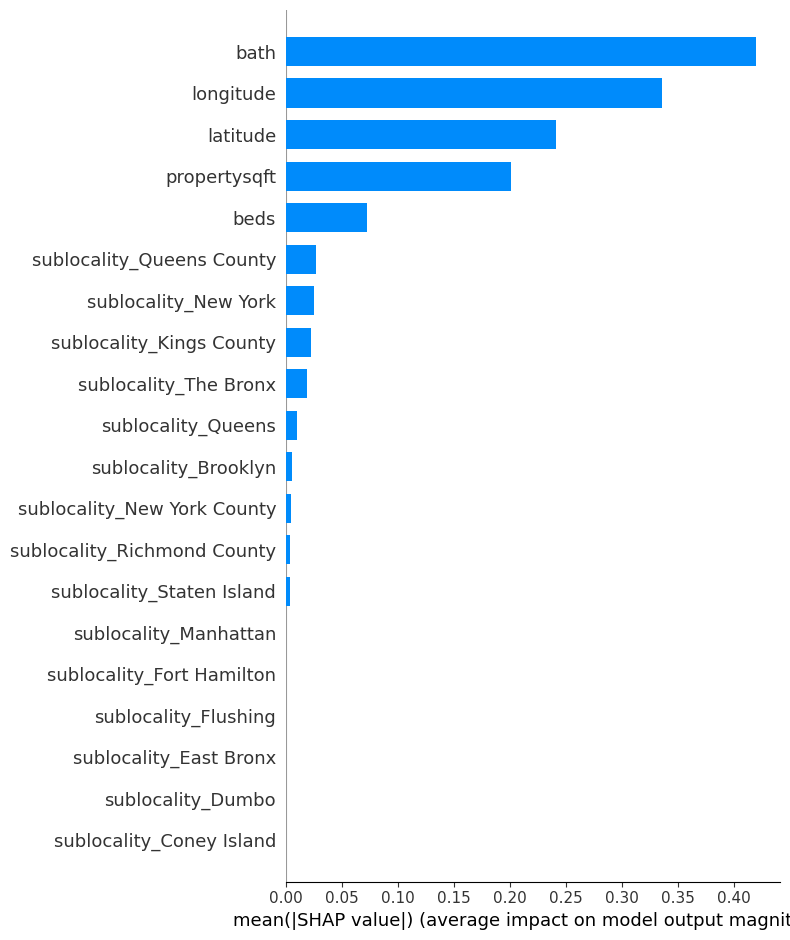

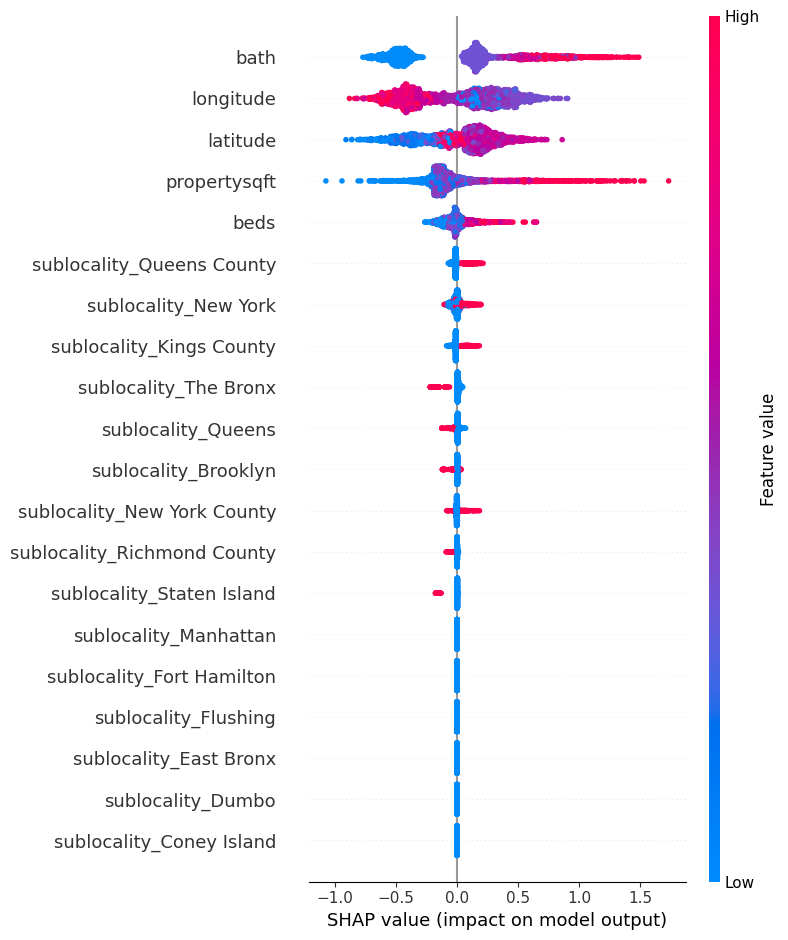

In [161]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type='bar')  

shap.summary_plot(shap_values, X_train)


# Visualisation of the true and predicted values.

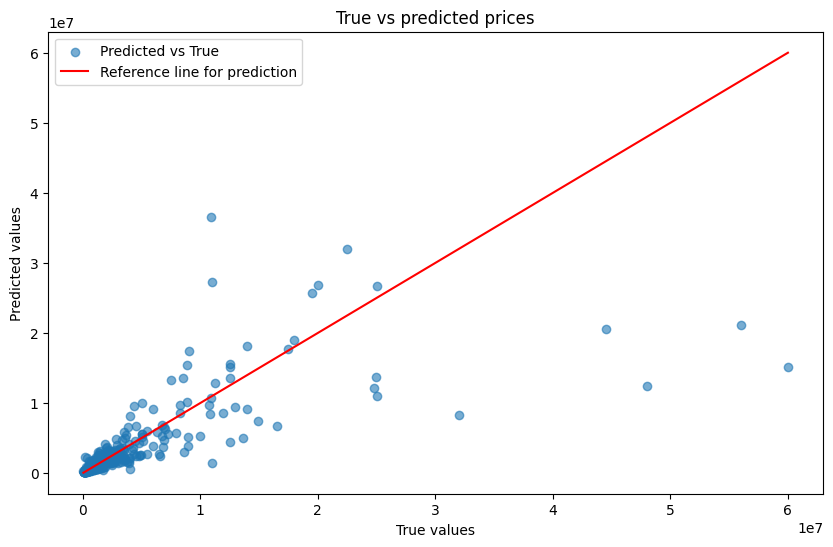

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.6, label='Predicted vs True')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 
         color='red', linestyle='-', label='Reference line for prediction')
plt.title('True vs predicted prices')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

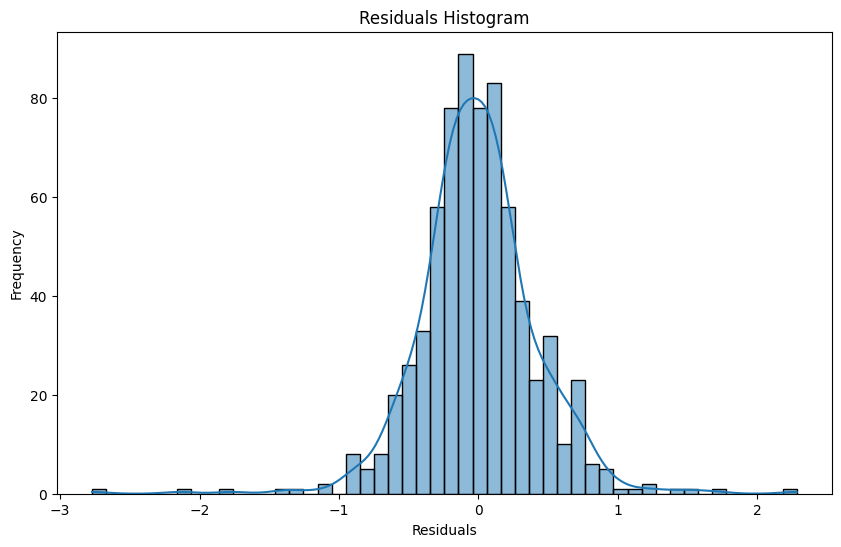

In [251]:
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# The model explains 86% of the variability, but it struggles with a high mean absolute error of nearly $900,000. Further improvements can be made by clustering properties based on price categories to minimize the impact of outliers, adding features for specific property types, and creating new features such as the distance to schools, subway stations, and other key facilities or attractions.